<a href="https://colab.research.google.com/github/subashkatwal/PRODIGY_DS_03/blob/main/Task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a decision tree

Installing the required libraries

In [40]:

!pip install pandas scikit-learn matplotlib seaborn shap imbalanced-learn



Importing Libraries

In [41]:

import pandas as pd
from sklearn.tree import plot_tree, DecisionTreeClassifier,export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import shap


Data Preprocessing

In [54]:
def pre_process_data(filepath, delimeter = ";"):

    """ In this section :
  Loads and preprocess the Banking Marketing dataset
  Arguments:
  filepath(str) --> Path to the file
  delimeter (str) --> Delimeter used in the dataset

  Returns :
        X (pd.DataFrame): Features.
        y (pd.Series): Target variable.
"""
    df= pd.read_csv('/content/bank-additional-full.csv', delimiter=';',on_bad_lines='skip')
    print("Dataset Summary")
    print(df.info())


    data = pd.get_dummies(df,drop_first= True)
    X= data.drop('y_yes', axis= 1)
    y = data ['y_yes']

    return X,y


In [55]:
def balance_data(X,y):
    """
    Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
    Arguments :
        X (pd.DataFrame): Features.
        y (pd.Series): Target variable.

    Returns:
        X_resampled (pd.DataFrame): Resampled features.
        y_resampled (pd.Series): Resampled target variable.
    """

    sm = SMOTE(random_state=42)  # Initialize SMOTE with a fixed random state for reproducibility
    X_resampled, y_resampled = sm.fit_resample(X, y)  # Applying SMOTE to balance the dataset
    print(f"Class distribution after SMOTE: {y_resampled.value_counts()}")  # Display new class distribution
    return X_resampled, y_resampled


Train the model

In [45]:
def train_model(X_train,y_train , param_grid = None):
    """ Training the decision tree classifer
      Arguments :
        X_train (pd.DataFrame): Training features.

    Returns:
        model (DecisionTreeClassifier): Trained model.
   """

    model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5)
    model.fit(X_train, y_train)  # Fit the model to the training data
    return model

Making predictions

In [64]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the trained model using metrics and visualizations.
    Arguments:
        model (DecisionTreeClassifier): Trained model .
        X_test (pd.DataFrame): Test features .
        y_test (pd.Series): Test target.
    """

#predict the target value
    y_prediction = model.predict(X_test)

# Accuracy of the model
    accuracy = accuracy_score(y_test, y_prediction)
    print(f"Accuracy : {accuracy:.2f}")

    print("Classification report \n")
    print(classification_report(y_test, y_prediction))
    print('\n\n\n')
# Confusion Matrix
    Conf= confusion_matrix(y_test, y_prediction)
    sns.heatmap(Conf,annot=True , fmt= 'd', cmap= 'Blues')
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print('\n\n\n')
# Decision tree visualization
    print("Decision Tree : \n ")
    plt.figure(figsize= (20,10))
    plot_tree (model,feature_names= X_test.columns, class_names=['Yes', 'No'],filled = True,  rounded = True, fontsize = 8)
    plt.show()
    print('\n\n\n')
#Print the rules learned by the model
    rules = export_text(model, feature_names=list(X_test.columns))
    print("\nDecision Tree Rules:")
    print(rules)

Main function

Dataset Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after SMOTE: y_yes
False    36548
True     36548
Name: count, dtype: int64
Accuracy : 0.89
Classification report 

              precision    recall  f1-score   support

       False       0.92      0.86      0.89     11005
        True       0.87      0.93      0.90     10924

    accuracy                           0.89     21929
   macro avg       0.89      0.89      0.89     21929
weighted avg       0.90      0.89      0.89     21929







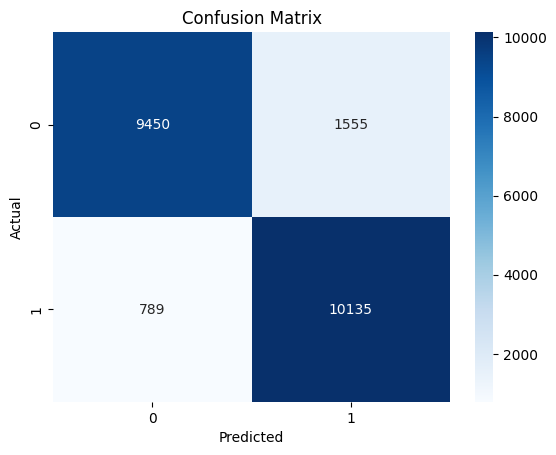





Decision Tree : 
 


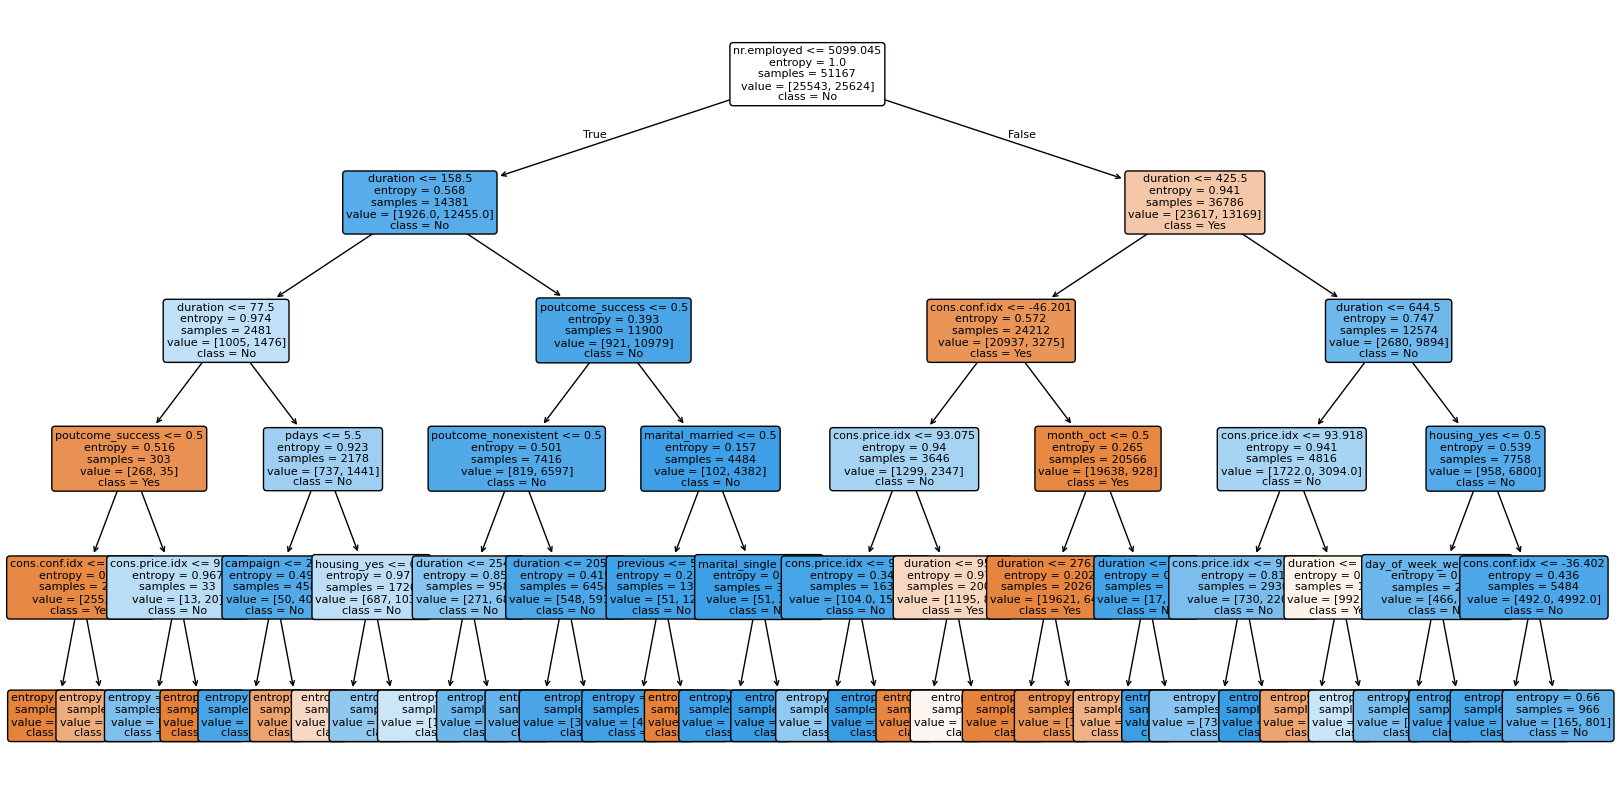






Decision Tree Rules:
|--- nr.employed <= 5099.05
|   |--- duration <= 158.50
|   |   |--- duration <= 77.50
|   |   |   |--- poutcome_success <= 0.50
|   |   |   |   |--- cons.conf.idx <= -30.07
|   |   |   |   |   |--- class: False
|   |   |   |   |--- cons.conf.idx >  -30.07
|   |   |   |   |   |--- class: False
|   |   |   |--- poutcome_success >  0.50
|   |   |   |   |--- cons.price.idx <= 92.86
|   |   |   |   |   |--- class: True
|   |   |   |   |--- cons.price.idx >  92.86
|   |   |   |   |   |--- class: False
|   |   |--- duration >  77.50
|   |   |   |--- pdays <= 5.50
|   |   |   |   |--- campaign <= 2.50
|   |   |   |   |   |--- class: True
|   |   |   |   |--- campaign >  2.50
|   |   |   |   |   |--- class: False
|   |   |   |--- pdays >  5.50
|   |   |   |   |--- housing_yes <= 0.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- housing_yes >  0.50
|   |   |   |   |   |--- class: True
|   |--- duration >  158.50
|   |   |--- poutcome_success <= 0.50
|   |

In [65]:
# Load the dataset
filepath = "/content/bank-additional-full.csv"

# Preprocess the dataset
X, y = pre_process_data(filepath)

# Balance the dataset using SMOTE
X, y = balance_data(X, y)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = train_model(X_train, y_train)

# Evaluate the model using test data
evaluate_model(model, X_test, y_test)
